In [123]:
import numpy as np
import pandas as pd

import yfinance as yf
yf.pdr_override()
from pandas_datareader import data as pdr
import os
import csv
from matplotlib import pyplot as plt
import scipy.stats as st


#Best S&P500 ETF to show performance of the S&P500
SPY = pdr.get_data_yahoo('SPY', start='2001-06-15')
#Best NASDAQ ETF to show performance of the NASDAQ
QQQ = pdr.get_data_yahoo('QQQ', start='2001-06-15')
#Best DOW ETF to show performance of the DOW
VTI = pdr.get_data_yahoo('VTI', start='2001-06-15')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [124]:
SPY.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-06-15 00:00:00-04:00,120.910004,122.400002,120.400002,121.849998,81.138466,16821100
2001-06-18 00:00:00-04:00,121.650002,122.440002,120.910004,121.260002,80.745583,11368300
2001-06-19 00:00:00-04:00,122.379997,122.889999,120.889999,121.790001,81.098511,7732300
2001-06-20 00:00:00-04:00,121.190002,122.860001,121.099998,122.430000,81.524712,8787200
2001-06-21 00:00:00-04:00,122.220001,124.309998,122.150002,123.820000,82.450294,12259100


In [125]:
SPY.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-30 00:00:00-05:00,402.799988,405.130005,400.279999,400.589996,400.589996,74202000
2023-01-31 00:00:00-05:00,401.130005,406.529999,400.769989,406.480011,406.480011,86811800
2023-02-01 00:00:00-05:00,405.209991,413.670013,402.350006,410.799988,410.799988,101459200
2023-02-02 00:00:00-05:00,414.859985,418.309998,412.880005,416.779999,416.779999,101654500
2023-02-03 00:00:00-05:00,411.589996,416.970001,411.450012,412.440002,412.440002,63912892


In [126]:
QQQ.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-06-15 00:00:00-04:00,41.799999,43.070000,41.279999,42.599998,36.629757,84589400
2001-06-18 00:00:00-04:00,42.639999,43.169998,41.400002,42.029999,36.139645,63539100
2001-06-19 00:00:00-04:00,43.320000,43.560001,41.259998,41.820000,35.959068,73386900
2001-06-20 00:00:00-04:00,41.299999,42.970001,41.279999,42.770000,36.775921,83588600
2001-06-21 00:00:00-04:00,42.669998,44.230000,42.299999,43.349998,37.274651,67212600


In [127]:
QQQ.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-27 00:00:00-05:00,292.000000,298.260010,291.880005,296.260010,296.260010,56161500
2023-01-30 00:00:00-05:00,292.929993,294.380005,289.890015,290.269989,290.269989,49405800
2023-01-31 00:00:00-05:00,290.309998,294.720001,290.200012,294.619995,294.619995,46705100
2023-02-01 00:00:00-05:00,294.410004,303.429993,292.299988,300.920013,300.920013,67562200
2023-02-02 00:00:00-05:00,307.570007,313.679993,306.730011,311.720001,311.720001,82568400


In [128]:
VTI.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-06-15 00:00:00-04:00,55.424999,56.005001,55.174999,55.665001,37.544476,1067400
2001-06-18 00:00:00-04:00,55.814999,55.915001,55.310001,55.310001,37.305042,282600
2001-06-19 00:00:00-04:00,56.150002,56.165001,55.235001,55.465000,37.409576,1777600
2001-06-20 00:00:00-04:00,55.375000,56.075001,55.375000,56.049999,37.804150,476000
2001-06-21 00:00:00-04:00,56.000000,56.724998,55.875000,56.500000,38.107666,240400


In [129]:
VTI.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-30 00:00:00-05:00,202.279999,203.610001,201.089996,201.210007,201.210007,2992300
2023-01-31 00:00:00-05:00,201.649994,204.490005,201.449997,204.429993,204.429993,4827600
2023-02-01 00:00:00-05:00,203.910004,208.320007,202.509995,206.919998,206.919998,4385600
2023-02-02 00:00:00-05:00,209.000000,210.880005,208.100006,210.009995,210.009995,3730800
2023-02-03 00:00:00-05:00,207.509995,210.179993,207.139999,207.899994,207.899994,2304578


In [130]:
VTI = VTI.reset_index()


In [131]:
QQQ = QQQ.reset_index()


In [132]:
SPY = SPY.reset_index()

In [133]:
VTI["Ticker"] = "VTI"
QQQ["Ticker"] = "QQQ"
SPY["Ticker"] = "SPY"
VTI.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2001-06-15 00:00:00-04:00,55.424999,56.005001,55.174999,55.665001,37.544476,1067400,VTI
1,2001-06-18 00:00:00-04:00,55.814999,55.915001,55.310001,55.310001,37.305042,282600,VTI
2,2001-06-19 00:00:00-04:00,56.150002,56.165001,55.235001,55.465000,37.409576,1777600,VTI
3,2001-06-20 00:00:00-04:00,55.375000,56.075001,55.375000,56.049999,37.804150,476000,VTI
4,2001-06-21 00:00:00-04:00,56.000000,56.724998,55.875000,56.500000,38.107666,240400,VTI


In [134]:
QQQ.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2001-06-15 00:00:00-04:00,41.799999,43.070000,41.279999,42.599998,36.629757,84589400,QQQ
1,2001-06-18 00:00:00-04:00,42.639999,43.169998,41.400002,42.029999,36.139645,63539100,QQQ
2,2001-06-19 00:00:00-04:00,43.320000,43.560001,41.259998,41.820000,35.959068,73386900,QQQ
3,2001-06-20 00:00:00-04:00,41.299999,42.970001,41.279999,42.770000,36.775921,83588600,QQQ
4,2001-06-21 00:00:00-04:00,42.669998,44.230000,42.299999,43.349998,37.274651,67212600,QQQ


In [135]:
SPY.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2001-06-15 00:00:00-04:00,120.910004,122.400002,120.400002,121.849998,81.138466,16821100,SPY
1,2001-06-18 00:00:00-04:00,121.650002,122.440002,120.910004,121.260002,80.745583,11368300,SPY
2,2001-06-19 00:00:00-04:00,122.379997,122.889999,120.889999,121.790001,81.098511,7732300,SPY
3,2001-06-20 00:00:00-04:00,121.190002,122.860001,121.099998,122.430000,81.524712,8787200,SPY
4,2001-06-21 00:00:00-04:00,122.220001,124.309998,122.150002,123.820000,82.450294,12259100,SPY


In [136]:
#Check to see if the data merged.
data = pd.concat([SPY, QQQ, VTI])
data.sample(30)

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
4425,2019-01-18 00:00:00-05:00,264.980011,266.980011,263.000000,266.459991,249.292740,127900300,SPY
4716,2020-03-17 00:00:00-04:00,245.039993,256.170013,237.070007,252.800003,240.991394,262070500,SPY
265,2002-07-11 00:00:00-04:00,42.950001,43.500000,42.125000,43.325001,29.675066,209400,VTI
4390,2018-11-27 00:00:00-05:00,266.339996,268.399994,265.660004,268.399994,249.649948,75502400,SPY
2497,2011-05-20 00:00:00-04:00,69.459999,69.580002,68.949997,69.139999,55.626728,1274200,VTI
1973,2009-04-23 00:00:00-04:00,33.000000,33.139999,32.490002,33.110001,29.180296,181666600,QQQ
2222,2010-04-20 00:00:00-04:00,120.559998,120.980003,119.870003,120.879997,94.735481,157708000,SPY
4832,2020-08-31 00:00:00-04:00,350.350006,351.299988,349.059998,349.309998,336.425354,66099200,SPY
1242,2006-05-26 00:00:00-04:00,128.009995,128.380005,127.510002,128.380005,92.560715,62989700,SPY
33,2001-08-02 00:00:00-04:00,43.790001,44.000000,42.820000,43.910000,37.756153,53187300,QQQ


In [137]:
#Test that we have the correct amount of Unique tickers added to the DataFrame
Ticker_count = len(data.groupby("Ticker").nunique())
print(Ticker_count)

3


In [138]:
#Describe the Data to see what pops out if anything.
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,16331.000000,16331.000000,16331.000000,16331.000000,16331.000000,1.633100e+04
mean,131.897670,132.729060,130.965832,131.901983,117.721118,6.304305e+07
std,94.352621,94.949256,93.693677,94.366972,94.962140,7.701211e+07
min,19.940001,20.530001,19.760000,20.059999,17.248650,1.160000e+04
25%,58.585001,58.934999,58.240002,58.582500,46.619064,2.981850e+06
50%,109.029999,109.589996,108.330002,109.019997,87.839394,4.293630e+07
75%,170.345001,171.245003,169.210007,170.290001,158.919441,9.015780e+07
max,479.220001,479.980011,476.059998,477.709991,470.083679,8.710263e+08


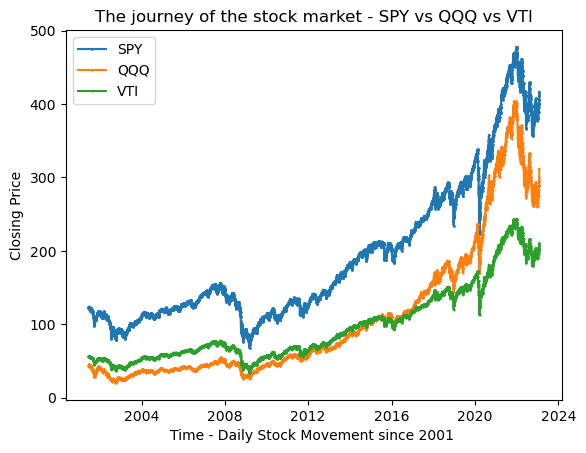

In [139]:
#Plot out the initial info we have to see what we are working with.
SPY_line = data.loc[data["Ticker"] == "SPY"]
QQQ_line = data.loc[data["Ticker"] == "QQQ"]
VTI_line = data.loc[data["Ticker"] == "VTI"]
plt.plot(SPY_line["Date"], SPY_line["Close"], marker = 'o', markersize=1)
plt.plot(QQQ_line["Date"], QQQ_line["Close"], marker = 'x', markersize=1)
plt.plot(VTI_line["Date"], VTI_line["Close"], marker = 'v', markersize=1)
plt.xlabel("Time - Daily Stock Movement since 2001 ")
plt.ylabel("Closing Price")
plt.title(f"The journey of the stock market - SPY vs QQQ vs VTI")
plt.legend(["SPY", "QQQ", "VTI"], loc="best")
plt.show()

In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16331 entries, 0 to 5443
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype                           
---  ------     --------------  -----                           
 0   Date       16331 non-null  datetime64[ns, America/New_York]
 1   Open       16331 non-null  float64                         
 2   High       16331 non-null  float64                         
 3   Low        16331 non-null  float64                         
 4   Close      16331 non-null  float64                         
 5   Adj Close  16331 non-null  float64                         
 6   Volume     16331 non-null  int64                           
 7   Ticker     16331 non-null  object                          
dtypes: datetime64[ns, America/New_York](1), float64(5), int64(1), object(1)
memory usage: 1.1+ MB


In [141]:
#Seems like we have all of the data points matching one another meaning that our initial 3 ETFs representing the Stock Market, DOW, NASDAQ and S&P500 are most likely in line with one another.
data.count()

Date         16331
Open         16331
High         16331
Low          16331
Close        16331
Adj Close    16331
Volume       16331
Ticker       16331
dtype: int64

In [142]:
count = data.groupby("Ticker")
count1 = count["Volume"].sum()
count1


Ticker
QQQ    386286850700
SPY    630980686292
VTI     12288560278
Name: Volume, dtype: int64

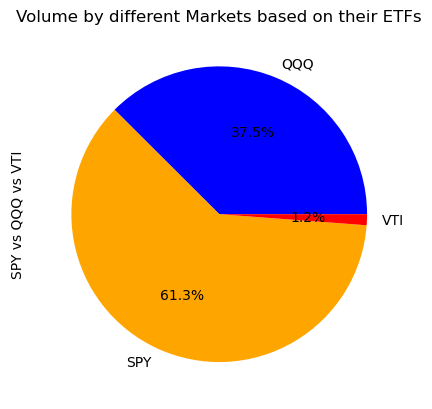

In [144]:
colors = ["blue","orange","red"]
label = count1.index.values
plt.pie(count1, labels=label, autopct="%1.1f%%", startangle=0, colors=colors,shadow=False)
plt.title("Volume by different Markets based on their ETFs")
plt.ylabel("SPY vs QQQ vs VTI")
plt.show()